<a href="https://colab.research.google.com/github/rajdeepd/tensorflow_2.0_book_code/blob/master/ch04/discover_cnns_basic_ops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="border: 1px solid #1CBCFF; border-left: 15px solid #1CBCFF; padding: 10px; text-align:justify;">
    <strong style="color: #1CBCFF">Tip.</strong> <a style="color: #000000;" href="https://nbviewer.jupyter.org/github/PacktPublishing/Hands-On-Computer-Vision-with-TensorFlow-2/blob/master/Chapter03/ch3_nb1_discover_cnns_basic_ops.ipynb" title="View with Jupyter Online">Click here to view this notebook on <code>nbviewer.jupyter.org</code></a>. 
    <br/>These notebooks are better read there, as Github default viewer ignores some of the formatting and interactive content.
    </p>

 <p style="background: #363636; color:#ffffff; text-align:justify; padding: 10px 25px;">
        <strong style="font-size: 1.0em;"><span style="font-size: 1.2em;"><span style="color: #363636;">Mastering Deep Learning with Tensorflow 2.1<br/>by <em>Rajdeep Dua</em> </strong><br/><br/>
        <strong>Chapter 4: Convolutional Neural Networks</strong><br/>Basic CNN Operations
 </p>


<br/>
<p style="border-left: 15px solid #363636; padding: 0 10px; text-align:justify;">
<strong style="color: #363636;">Tip.</strong> The notebooks shared on this git repository illustrate some notions from the book "<em><strong>Mastering Deep Learning with Tensorflow 2.1</strong></em>" written by Rajdeep Dua, published by BPB. If you enjoyed the insights shared here, <a href=".." title="Learn more about the book!"><strong>please consider acquiring the book!</strong></a>
<br/><br/>

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
IN_COLAB

True

In [0]:
%matplotlib inline
# !pip install scikit-image   # Uncomment to install this module
# !pip install matplotlib     # Uncomment to install this module
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage import io  

## Setup

Let us first open and display the image we will use as example:

In [0]:
if IN_COLAB:
  image = io.imread("https://github.com/rajdeepd/tensorflow_2.0_book_code/raw/master/ch04/res/peacock-in-black-and-white.jpg")
else:
  image = io.imread("./res/peacock-in-black-and-white.jpg")

Image shape: (861, 1300)


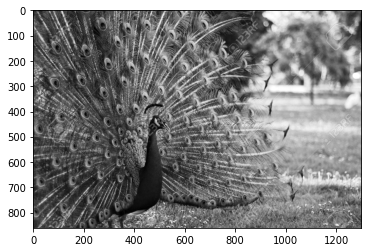

In [5]:
print("Image shape: {}".format(image.shape))
plt.imshow(image, cmap=plt.cm.gray)

To feed this image to TensorFlow operations, we will first convert it into a `Tensor`:

In [0]:
image = tf.convert_to_tensor(image, tf.float32, name="input_image")

As most of the Tensorflow operations are meant for batched images, i.e., of shape $(B, H, W, D)$ we will synthetically *expand* the dimensions of our image, to turn it into a batch of one single image:

In [7]:
image = tf.expand_dims(image, axis=0) # we expand our tensor, adding a dimension at position 0
print("Tensor shape: {}".format(image.shape))

Tensor shape: (1, 861, 1300)


Similarly, as our image is grayscale and have only one channel, it currently doesn't explicitely have a 4th depth dimension. We correct that by expanding our tensor again:


In [8]:
image = tf.expand_dims(image, axis=-1) # we expand our tensor, adding a dimension at position 0
print("Tensor shape: {}".format(image.shape))

Tensor shape: (1, 861, 1300, 1)


## Convolution

As presented in Chapter 2, the basic method for ***image convolution*** in TensorFlow is **`tf.nn.conv2()`**. We will use it to reproduce the Figures 3 and 4 of the chapter.

In Figure 3, we define a $3 \times 3$ filter (or kernel) commonly used to blur images (*Gaussian* blur):

In [0]:
kernel = tf.constant([[1 / 16, 2 / 16, 1 / 16],
                      [2 / 16, 4 / 16, 2 / 16],
                      [1 / 16, 2 / 16, 1 / 16]], tf.float32, name="gaussian_kernel")

However, the convolution method requires the `filter` tensor to be of shape $(k, k, D, N)$ (with $k$ the filter size for square ones, and $N$ the number of filters). Though $D = 1$ and $N = 1$ in our case, we still need to reshape our kernel to explicitely express those values:

In [0]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

To *filter* the image with our kernel, it is now just a matter of calling `tf.nn.conv2()`:


In [0]:
blurred_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding="SAME")

By default in _eager_ mode with TensorFlow 2, we can directly recover the result of the operation:

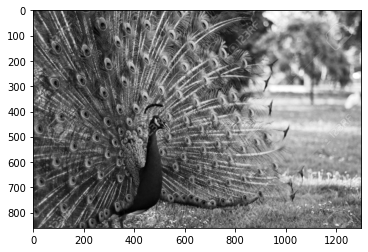

In [12]:
blurred_res = blurred_image.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)

## Box Blur
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [0]:
kernel_2 = tf.constant([[1/9,1/9, 1/9],
                      [1/9,  1/9, 1/9],
                      [1/9,  1/9, 1/9]], tf.float32, name="box_blur_kernel")
kernel_2 = tf.expand_dims(tf.expand_dims(kernel_2, axis=-1), axis=-1)

In [0]:
blurred_image_2 = tf.nn.conv2d(image, kernel_2, strides=[1, 1, 1,1], padding="SAME")

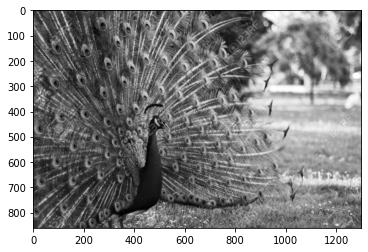

In [0]:
blurred_res_2 = blurred_image_2.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res_2 = blurred_res_2[0, ..., 0]

plt.imshow(blurred_res_2, cmap=plt.cm.gray)

Observing the bird's feathers or the landscape'S details, we can see how blurred the image slightly became.

In Figure 4, a kernel for ***contour detection*** is used. This kernel is defined as follows:

In [0]:
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]], tf.float32, name="edge_kernel")
kernel = tf.expand_dims(tf.expand_dims(kernel, axis=-1), axis=-1)

This time, we use a larger stride to demonstrate how this affects the resulting tensors:

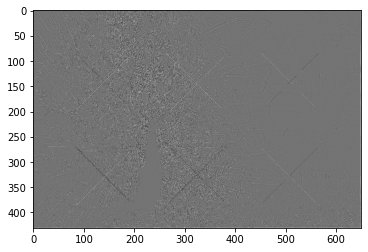

In [0]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="SAME")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

If you look closely, the image has a white border. This is caused by the zero-padding (since we chose padding `"SAME"`), detected as a contour by the kernel. Indeed, it disappears if we don't pad the image:

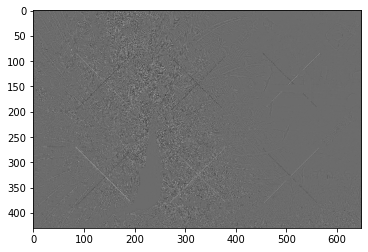

In [0]:
edge_image = tf.nn.conv2d(image, kernel, strides=[1, 2, 2, 1], padding="VALID")
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

## Pooling

For ***max-pooling*** and ***average-pooling***, the values in each window are aggregated into a single output, applying respectively the max or averaging operation. Once again, we use the low-level TensorFlow API to reproduce the results shown in the chapter:

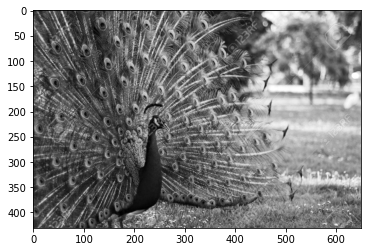

In [0]:
avg_pooled_image = tf.nn.avg_pool(image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
avg_res = avg_pooled_image.numpy()[0, ..., 0]
plt.imshow(avg_res, cmap=plt.cm.gray)

With these _hyper-parameters_, the average pooling divided each dimension of the input image by 2.

Now performing the max-pooling:

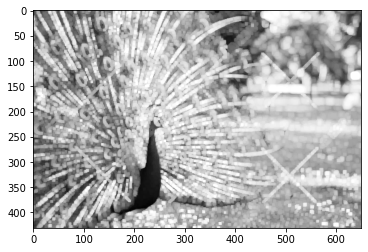

In [0]:
max_pooled_image = tf.nn.max_pool(image, ksize=[1, 10, 10, 1], strides=[1, 2, 2, 1], padding="SAME")
max_res = max_pooled_image.numpy()[0, ..., 0]
plt.imshow(max_res, cmap=plt.cm.gray)

Using an excessively large kernel size, we can see how the operation assignes the largest value per window. 

### Conclusion

Adding these operations to the fully-connected layer presented earlier, we now have the tools to build our first CNN - which will be the topic of the next notebook.